In [1]:
import numpy as np
import math     
from math import sqrt , erfc, erf, exp
import matplotlib.pyplot as plt

%matplotlib inline

# Hunt (1999)
# Streamflow depletion in partially penetrating stream with semipervious streambed, 
# unconfined aquifer with infinite extent.

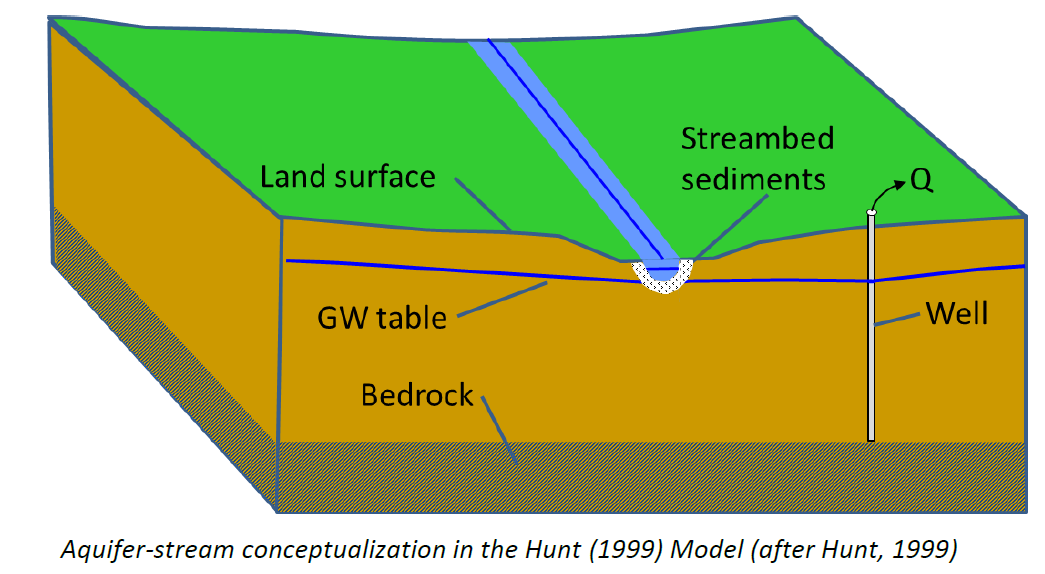

In [2]:
from IPython.display import Image 
pil_img = Image(filename='./Conceptual_models/Hunt1999.png')
display(pil_img)

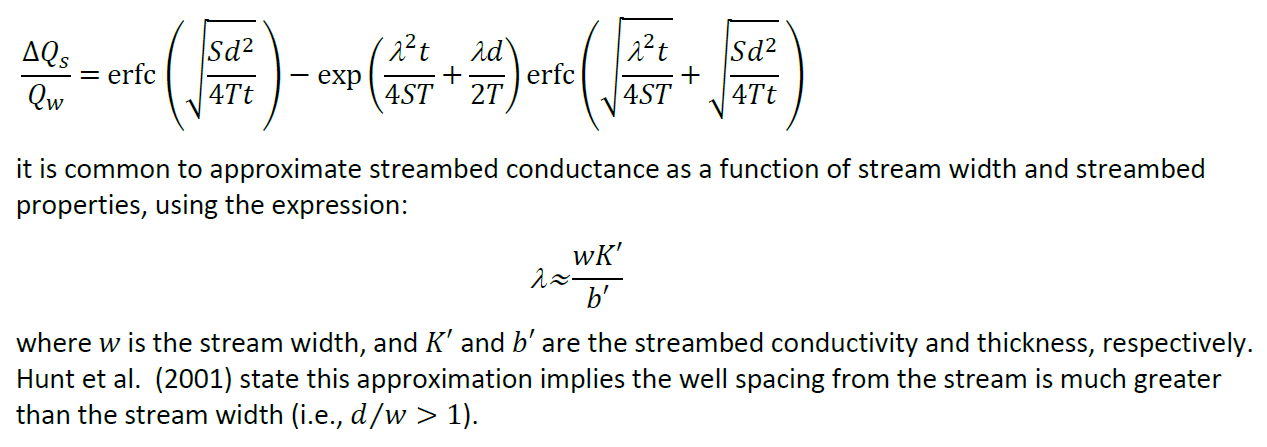

In [3]:
pil_img = Image(filename='./Conceptual_models/Hunt1999_f.png')
display(pil_img)

In [4]:
  # param lmda streambed conductance term, lambda [L/T]. 
  # Can be estimated with {streambed_conductance}.
  # param lmda_max maximum allowed `lmda` [L/T]. If `lmda` is too high, exp and erfc calculations in 
  # Hunt solution are not computationally possible, so you may need to artifically reduce `lmda` 
   
  #  details This function is described in Hunt (1999). When {lmda} term gets very large, 
  #  this is equivalent to {glover}. It contains numerous assumptions:
  #  simplified assumptions :{
  #  Horizontal flow >> vertical flow (Dupuit assumptions hold)
  #  Homogeneous, isotropic aquifer
  #  Constant {Tr}: Aquifer is confined, or if unconfined change in head is small relative to aquifer thickness
  #  Stream is straight, infinitely long, and remains in hydraulic connection to aquifer
  #  Constant stream stage
  #  No changes in recharge due to pumping
  #  No streambank storage
  #  Constant pumping rate
  #  Aquifer extends to infinity
  # }
  # return A numeric of {Qf}, streamflow depletion as fraction of pumping rate [-].
  # If the pumping rate of the well ({Qw}; [L3/T]) is known, 
  # you can calculate volumetric streamflow depletion [L3/T] as {Qf*Qw}

  # references
  # Hunt, B (1999). Unsteady Stream Depletion from Ground Water Pumping.
  # Ground Water 37 (1): 98-102. doi:10.1111/j.1745-6584.1999.tb00962.x.

In [5]:
    # constants
S = 0.15    # param S aquifer storage coefficient [](specific yield if unconfined; storativity if confined)
d = 50      # param d distance from well to stream [L]
t = 3650       # param t times you want output for [T]
Kh = 10    # param Kh aquifer horizontal hydraulic conductivity [L/T]
b = 100     # param b aquifer saturated thickness [L]
Kriv = 0.01  # param Kriv streambed semipervious layer hydraulic conductivity [L/T]
briv = 10    # param briv streambed semipervious layer thickness [L]
w = 10      #  stream width  [L]

In [6]:
    # Streambed Leakance
lmda = (w * Kriv) / briv
  # Transmissivity
Tr = Kh * b
     
sfd = [erfc(sqrt(S * d**2 / (4 * Tr * 1+i))) - exp((lmda**2 * 1+i) / ((4*S * Tr) \
    + (lmda * d / 2* Tr))) * erfc(sqrt((lmda**2 * 1+i) / (4* S * Tr)) + sqrt((S * d **2) / (4 * Tr * 1+i)))
    for i in range(0, t, 1)]
sfd1 = (sfd)
np.array(sfd1)

array([4.19304036e-04, 4.06695335e-02, 5.67913055e-02, ...,
       7.43576731e-01, 7.43599364e-01, 7.43621989e-01])

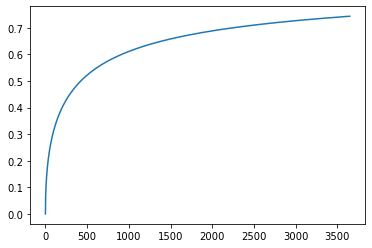

In [7]:
# SFD = streamflow depletion factor
plt.plot(sfd1)

In [8]:
Qw = 10      # pumping rate of the well ({Qw}; [L3/T])

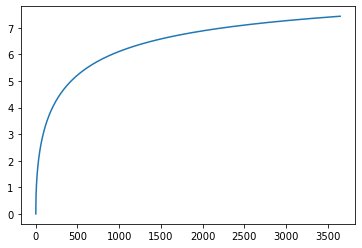

In [9]:
# Plot capture fraction through time
capture = Qw * np.array(sfd1)
plt.plot(capture)

In [ ]:
np.savetxt("Hunt_1999.csv", capture, delimiter="/")